# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.141467e+01     7.699639e+00
 * time: 0.0056171417236328125
     1     2.866327e+01     5.674586e+00
 * time: 0.016308069229125977
     2     2.237202e+01     5.760288e+00
 * time: 0.042279958724975586
     3     1.360079e+01     1.540515e+00
 * time: 0.07269001007080078
     4     1.244967e+01     1.986890e+00
 * time: 0.09310603141784668
     5     1.192369e+01     1.271141e+00
 * time: 0.11385798454284668
     6     1.084536e+01     1.958307e+00
 * time: 0.13664698600769043
     7     1.009546e+01     9.957868e-01
 * time: 0.1568741798400879
     8     9.767163e+00     8.937170e-01
 * time: 0.17720913887023926
     9     9.592515e+00     6.178542e-01
 * time: 0.19755315780639648
    10     9.468395e+00     5.492029e-01
 * time: 0.21752715110778809
    11     9.420220e+00     9.969547e-01
 * time: 0.23423004150390625
    12     9.323053e+00     6.657409e-01
 * time: 0.2512021064758301
    13     9.242352e+00     4.987988e-01
 * tim

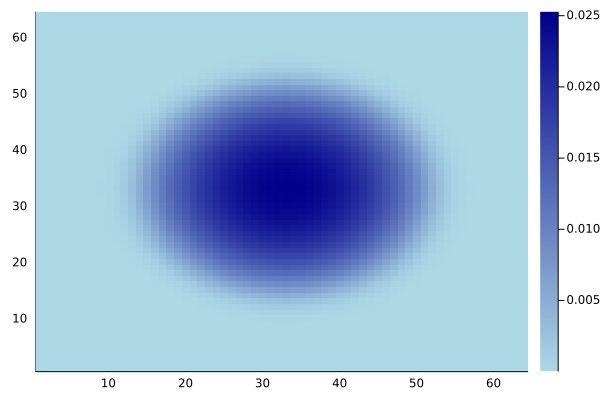

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)